In [42]:
'''
1 * 10 * 1 的神经网络
'''
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

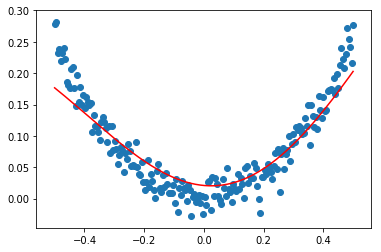

In [69]:
#生成200个随机点,注意是二维的数组的技巧
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
# x_data = np.linspace(-0.5,0.5,200)[:,None]

noise = np.random.normal(0,0.02,x_data.shape)

y_data = x_data**2 + noise

# 定义两个占位符
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#构建一个1 * 10 * 1的神经网络
#的隐藏层
w1 = tf.Variable( tf.random_normal([1,10]) )
b1 = tf.Variable(tf.zeros([1,10]))
net1 = tf.matmul(x,w1) + b1
l1 = tf.nn.tanh(net1)

# 定义一个神经网络的输出层
w2 = tf.Variable(tf.random_normal([10,1]))
b2 = tf.Variable(tf.zeros([1,1]))
net2 = tf.matmul(l1,w2) + b2
prediction = tf.nn.tanh(net2)

# 定义损失函数
loss = tf.reduce_mean(tf.square(y - prediction))
# 梯度下降优化器,步长为0.1
optimizer = tf.train.GradientDescentOptimizer(0.1)
# 最小化目标函数
objectFun = optimizer.minimize(loss)

with tf.Session() as sess:
    # 初始化变量
    sess.run(tf.global_variables_initializer())
    # 进行迭代，训练神经网络
    for step in np.arange(1000):
        # 输入x_data,y_data进行训练
        sess.run(objectFun,feed_dict={x:x_data,y:y_data})

    # 训练好之和，获取预测值
    prediction_value = sess.run(prediction,feed_dict = {x:x_data,y:y_data})
    
    # 绘图
    plt.figure()
    plt.plot(x_data,prediction_value,'r-')
    plt.scatter(x_data,y_data)
    plt.show()
